# Exemplo Calculo Manual TDF

Coeficientes X[k]: [0.+0.j 2.+0.j 0.-0.j 2.+0.j]


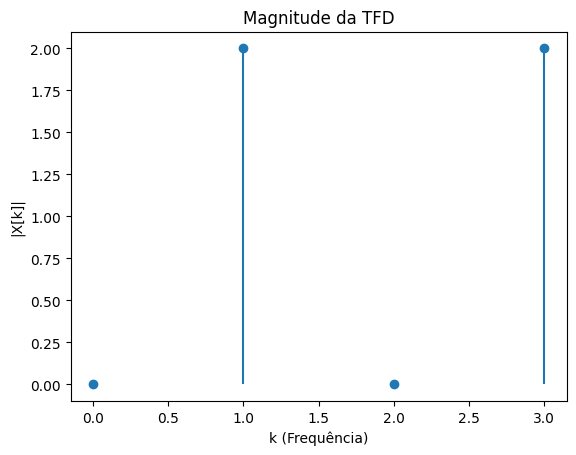

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição of the signal discretex = np.array([1, 0, -1, 0])  # Sinal x[n]N = len(x)  # Number of samples (in other words, 4)
# Cálculo of the TFD manualmenteX = np.zeros(N, dtype=complex)
for k in range(N):
    for n in range(N):
        X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)

# Exibição of the coefficientsprint("Coeficientes X[k]:", np.round(X, 4))

# Visualization of the spectrumplt.stem(np.abs(X), basefmt=" ")
plt.title("Magnitude da TFD")
plt.xlabel("k (Frequência)")
plt.ylabel("|X[k]|")
plt.show()


In [ ]:
print(np.exp(-1j*np.pi/2))

(6.123233995736766e-17-1j)


# Convolution circulair. Example 1:

In [ ]:
import numpy as np

# Sinais de entradaN = 4
x = np.array([1, 2, 3, 4])
h = np.array([1, 0, -1, 0])

# Vector for armazenar the result of the convolution circulary = np.zeros(N)

# Cálculo manual of the convolution circular# y[n] = sum_{k=0}^{N-1} x[k] * h[(n - k) mod N]for n in range(N):
    for k in range(N):
        y[n] += x[k] * h[(n - k) % N]

# Exibindo o resultadoprint("Sinal x[n]:", x)
print("Sinal h[n]:", h)
print("Resultado da convolução circular y[n]:", y)


Sinal x[n]: [1 2 3 4]
Sinal h[n]: [ 1  0 -1  0]
Resultado da convolução circular y[n]: [-2. -2.  2.  2.]


In [ ]:
(-3)%4

1

# Exemplo 2

In [ ]:
import numpy as np
# Definição of the sequênciasN = 6  # Comprimento of the convolution circular
x1 = np.array([1, 2, 3, 4, 5, 6])  # Definida para n=0 a n=5x2 = np.array([0, 0, 1, 0, 0, 0])  # Ajustada para comprimento 6 com padding
# Inicializando the vector of output for armazenar the convolution circulary_manual = np.zeros(N)

# Cálculo manual of the convolution circularfor n in range(N):
    for k in range(N):
        y_manual[n] += x1[k] * x2[(n - k) % N]  # Convolution circular
# Exibir the results of the cálculo manualprint("Resultado da convolução circular manual: ", y_manual)


Resultado da convolução circular manual:  [5. 6. 1. 2. 3. 4.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição of the sequênciasN = 6  # Comprimento of the convolution circular
x1 = np.array([1, 2, 3, 4, 5, 6])  # Definida para n=0 a n=5x2 = np.array([0, 0, 1, 0, 0, 0])  # Ajustada para comprimento 6 com padding
# Inicializando the vector of output for armazenar the convolution circulary_manual = np.zeros(N)

# Cálculo manual of the convolution circularfor n in range(N):
    for k in range(N):
        y_manual[n] += x1[k] * x2[(n - k) % N]  # Convolution circular
# Creating the graph for esboçar the convolution circularplt.figure(figsize=(8, 5))
plt.stem(range(N), y_manual, basefmt=" ", linefmt="g", markerfmt="go", label="y[n] = x1[n] ⊛ x2[n]")
plt.title("Convolução Circular de Seis Pontos")
plt.xlabel("Índice n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


# FFT

In [ ]:
import numpy as np
import time

# Definição of the signalN = 1024  # Number of pointsx = np.sin(2 * np.pi * 10 * np.arange(N) / N)  # Sinal senoidal de 10 Hz
# Cálculo of the DFT manualmentedef dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Medindo o tempo da DFTstart_time = time.time()
X_dft = dft(x)
print("Tempo da DFT manual:", time.time() - start_time)

# Medindo o tempo da FFTstart_time = time.time()
X_fft = np.fft.fft(x)
print("Tempo da FFT:", time.time() - start_time)

# comparison of the resultsprint("Os resultados são iguais?", np.allclose(X_dft, X_fft))


Tempo da DFT manual: 2.009270191192627
Tempo da FFT: 0.0013489723205566406
Os resultados são iguais? True


## What this code does? Generates a signal with duas frequencies (50 Hz and 120 Hz). Uses the FFT for encontrair the frequencies presentes.plota the spectrum of magnitude.

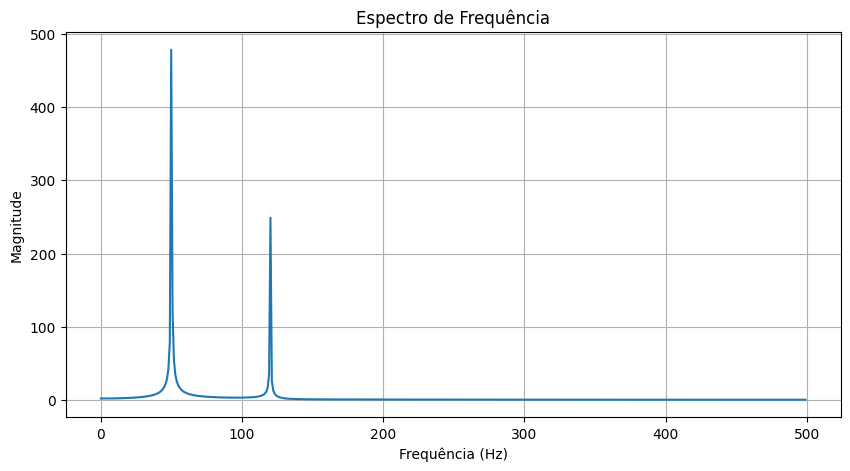

In [ ]:
import matplotlib.pyplot as plt

# Parâmetros of the signalfs = 1000  # Frequency of sampling (Hz)N = 1024   # Number of samplest = np.arange(N) / fs  # Vetor de tempo
# Signal composto by duas frequenciesx = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

# Cálculo of the FFTX = np.fft.fft(x)
freqs = np.fft.fftfreq(N, 1/fs)  # Frequencies correspondentes
# Plotando o espectro de magnitudeplt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], np.abs(X[:N//2]))  # Apenas metade do espectroplt.title("Espectro de Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


Case queira if aventurair: Modifique the code of the Example 2 for incluir a terceira frequency (200 Hz). Test with different values of 𝑁 in the FFT and veja as the resolution espectral muda.

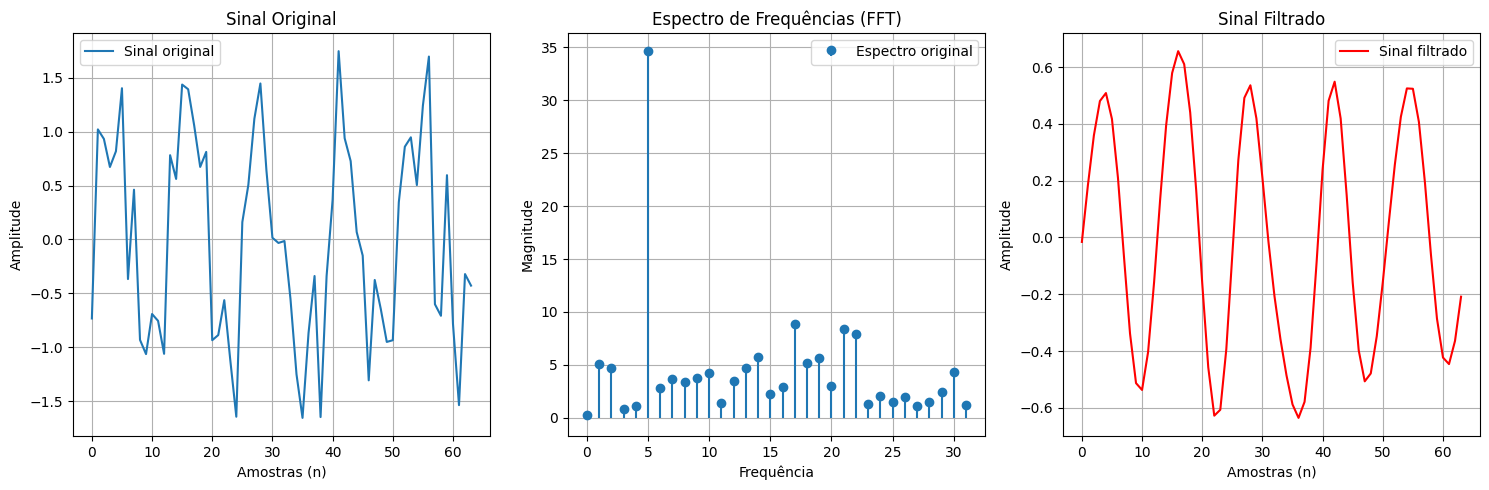

In [ ]:
# Reexecutando the code after reset
import numpy as np
import matplotlib.pyplot as plt

# Definição of the parâmetros of the signalN = 64
n = np.arange(N)

# Signal composto by a senóide 5Hz + noise gaussianox = np.sin(2 * np.pi * 5 * n / N) + 0.5 * np.random.randn(N)  # Signal with noise
# Cálculo of the FFTX = np.fft.fft(x)
freqs = np.fft.fftfreq(N)  # Frequencies associadas à FFT
# Zerando coefficients of alta frequencyX_filtered = X.copy()
X_filtered[10:] = 0  # Mantendo only baixas frequencies
# Aplicação of the IDFT for reconstruction of the signal filtradox_filtered = np.fft.ifft(X_filtered).real

# Plotando o sinal original, a FFT e o sinal filtradoplt.figure(figsize=(15, 5))

# Sinal original no tempoplt.subplot(1, 3, 1)
plt.plot(n, x, label="Sinal original")
plt.title("Sinal Original")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Espectro da FFT originalplt.subplot(1, 3, 2)
plt.stem(freqs[:N//2] * N, np.abs(X[:N//2]), basefmt=" ", label="Espectro original")
plt.title("Espectro de Frequências (FFT)")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()

# Sinal filtrado no tempoplt.subplot(1, 3, 3)
plt.plot(n, x_filtered, label="Sinal filtrado", color='r')
plt.title("Sinal Filtrado")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
